In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('AAPL_stock_data.csv',skiprows=2)

In [4]:
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
1,2015-01-05,23.604326,24.137507,23.417714,24.057530,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937576,24.037547,23.704309,23.815388,160423600
4,2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


Basic Info and Summary Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2515 non-null   datetime64[ns]
 1   Close   2515 non-null   float64       
 2   High    2515 non-null   float64       
 3   Low     2515 non-null   float64       
 4   Open    2515 non-null   float64       
 5   Volume  2515 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB


In [7]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2515,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,2019-12-31 01:37:54.512922624,93.994613,94.907267,92.978799,93.906769,1.171176e+08
min,2015-01-02 00:00:00,20.647446,20.951433,20.448606,20.569750,2.323470e+07
25%,2017-07-01 12:00:00,35.277452,35.681945,34.917545,35.308424,7.108210e+07
50%,2019-12-31 00:00:00,64.509293,64.859462,63.698885,64.267085,1.003845e+08
75%,2022-06-29 12:00:00,150.535995,152.267283,148.515894,150.317857,1.426222e+08
max,2024-12-30 00:00:00,258.396667,259.474086,257.010028,257.568678,6.488252e+08
std,NaN,65.518476,66.112100,64.829414,65.435984,6.839566e+07


Visualize Missing Values

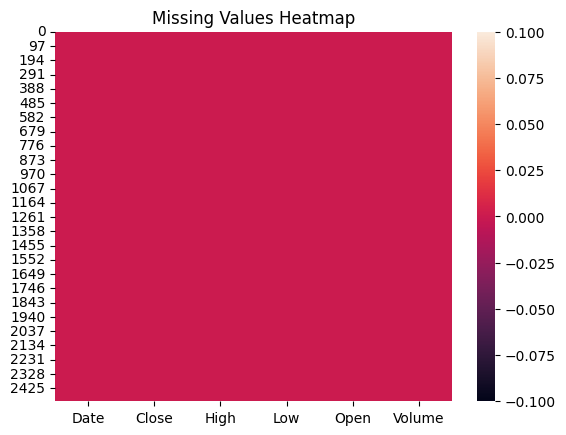

In [9]:
sns.heatmap(df.isnull())
plt.title("Missing Values Heatmap")
plt.show()

Line plot : Daily Stock Prices

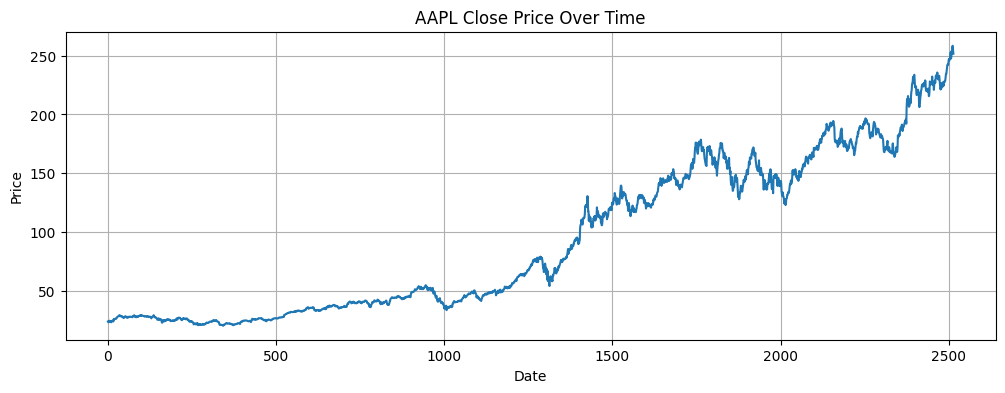

In [10]:

df['Close'].plot(title='AAPL Close Price Over Time', figsize=(12, 4))
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Plot for moving average

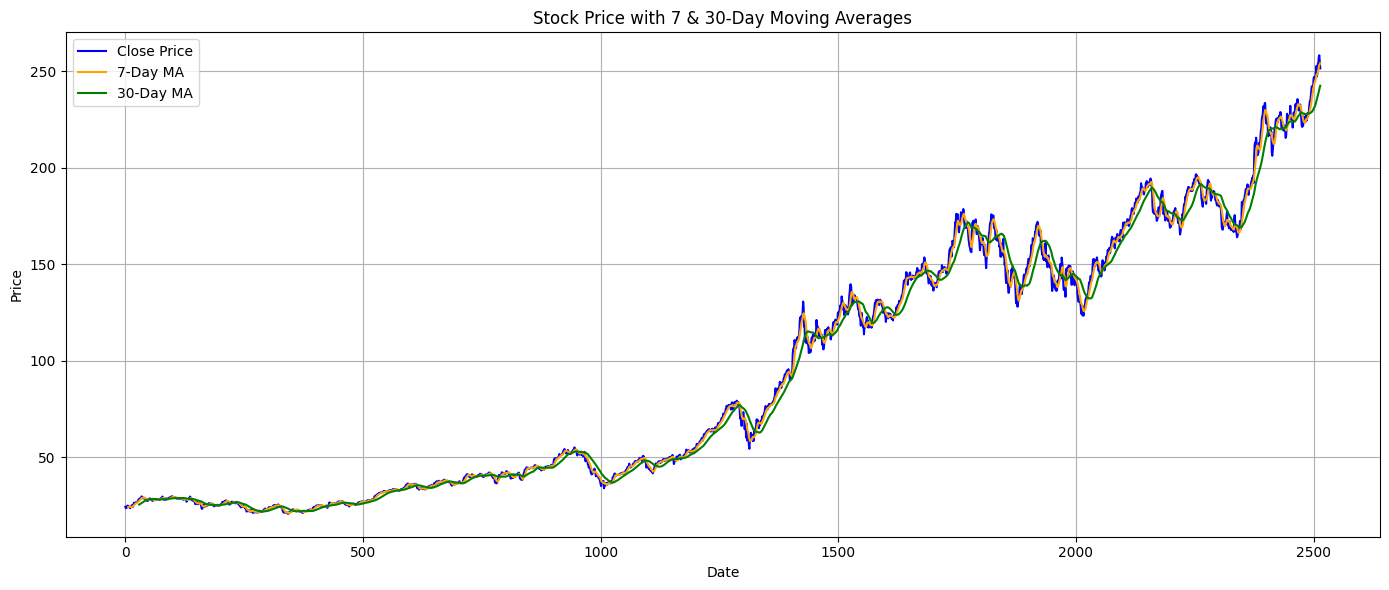

In [11]:
plt.figure(figsize=(14, 6))

plt.plot(df['Close'], label='Close Price', color='blue')

plt.plot(df['Close'].rolling(window=7).mean(), label='7-Day MA', color='orange')

plt.plot(df['Close'].rolling(window=30).mean(), label='30-Day MA', color='green')

plt.title('Stock Price with 7 & 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ADF Test for Stationarity
[Required for ARIMA Model]

p-value < 0.05 --> Series is stationary          
p-value > 0.05 --> Needs Differencing

In [12]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Close'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: 0.8448221483134908
p-value: 0.9923262898542512


p-value > 0.05 (0.99) --> Series is Stationary

Seasonal Decomposition

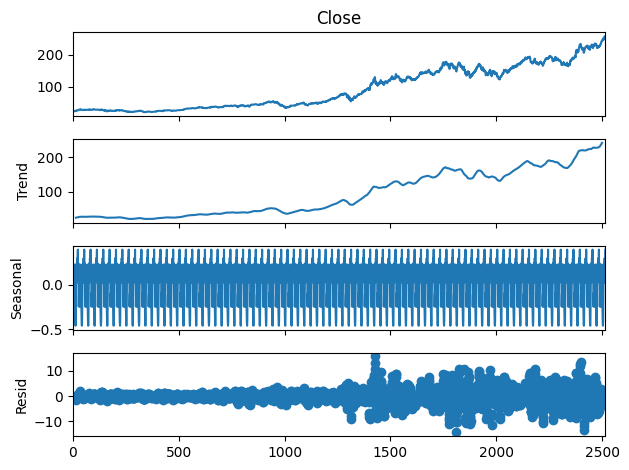

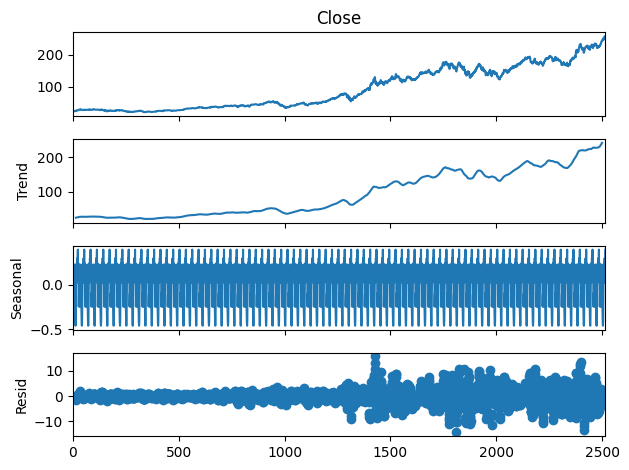

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_result = seasonal_decompose(df['Close'], model='additive', period=30)
seasonal_result.plot()


Autocorrelation & Partial Autocorrelation

Used to determine the lag order for ARIMA/SARIMA models.

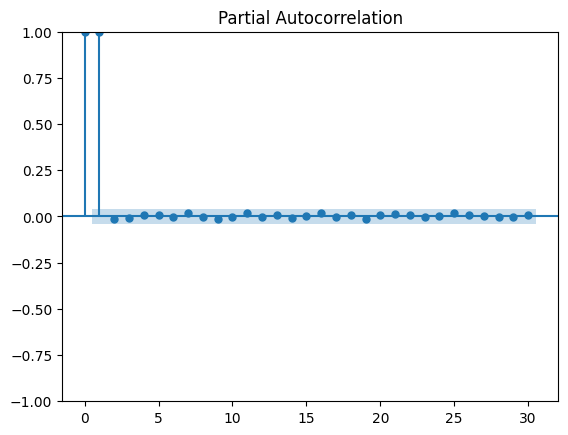

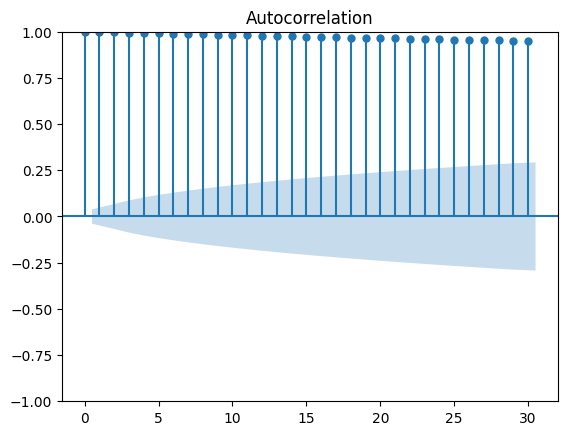

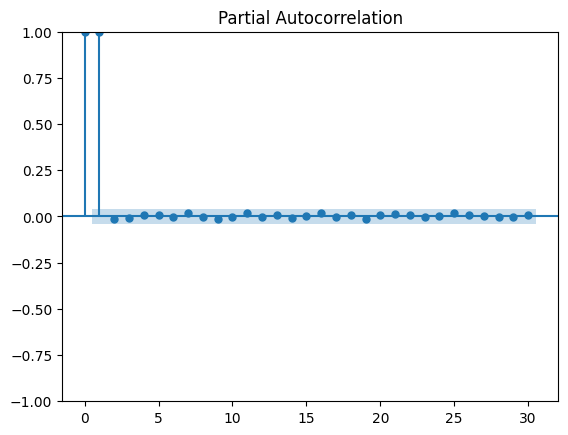

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'].dropna(), lags=30)
plot_pacf(df['Close'].dropna(), lags=30)


Correlation Heatmap

<Axes: >

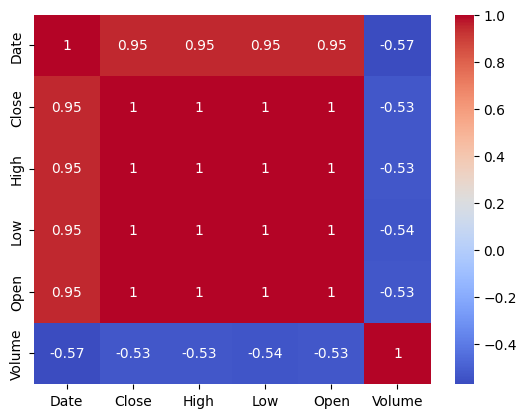

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Detecting Outliers (IQR Method)

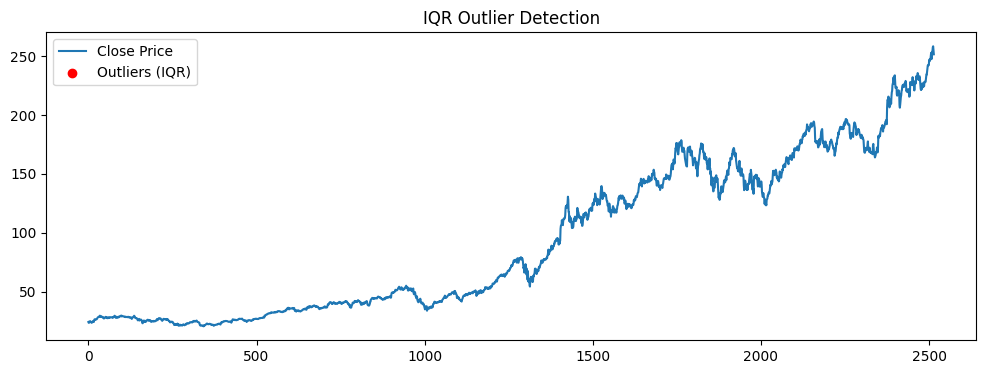

In [16]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

plt.figure(figsize=(12, 4))
plt.plot(df['Close'], label='Close Price')
plt.scatter(outliers_iqr.index, outliers_iqr['Close'], color='red', label='Outliers (IQR)')
plt.title('IQR Outlier Detection')
plt.legend()
plt.show()


Saving New csv file

In [17]:
df.to_csv('apple_data.csv', index=False)

In [19]:
new_df=pd.read_csv('apple_data.csv')
new_df.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
1,2015-01-05,23.604326,24.137507,23.417714,24.057530,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937576,24.037547,23.704309,23.815388,160423600
4,2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [20]:
new_df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64